# ME1 


## Exploratory Data Analysis

- See the examples of basic visualization and Pandas on Canvas. 

#### Write full names of your team members here.

-Author: Lucas Ehinger

-Teammate: Samuel Monson


## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [1]:
import pandas as pd

# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [2]:
#display all data. You can uncomment the code in the next line

display(data)

data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Solve each of the following problems. 
- Check the example Python codes for data visualization and pandas DataFrame examples: EX1_pandas.zip on Week1 Synopsis in Canvas.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 

(8) Discuss what the differences are between the three: (1) boxplot, (2) histogram, and (3) scatter plot with respect to your founding. 

In [3]:
#1. Look for mean of data
print(data.mean())

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64


In [4]:
#1. Look for median of data
print(data.median())

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64


In [5]:
#1. Look for mode of data
print(data.mode())

      TV  Radio  Newspaper  Sales
0   17.2    4.1        8.7    9.7
1   76.4    5.7        9.3    NaN
2  109.8    NaN       25.6    NaN
3  177.0    NaN        NaN    NaN
4  184.9    NaN        NaN    NaN
5  197.6    NaN        NaN    NaN
6  199.8    NaN        NaN    NaN
7  222.4    NaN        NaN    NaN
8  237.4    NaN        NaN    NaN
9  240.1    NaN        NaN    NaN


In [6]:
#2 Look at summary statistics for each field.
data.describe().drop(['count','mean','std'])

,TV,Radio,Newspaper,Sales
min,0.700,0.000,0.30,1.600
25%,74.375,9.975,12.75,10.375
50%,149.750,22.900,25.75,12.900
75%,218.825,36.525,45.10,17.400
max,296.400,49.600,114.00,27.000


Notice that the 50% percentile values match the median previously calculated, as we would expect. 

In [7]:
#3. Create a boxplot of the data

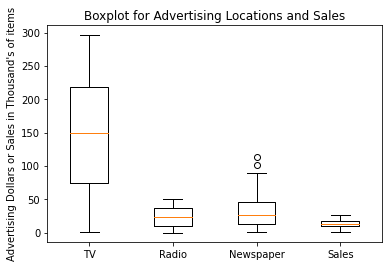

In [8]:
from matplotlib import pyplot as plt
plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ["TV","Radio","Newspaper","Sales"])
plt.ylabel("Advertising Dollars or Sales in Thousand's of items")
plt.title("Boxplot for Advertising Locations and Sales")
plt.show()

The boxplot values match the min, 25%, 50%, 75%, and max values calculated in #3. The only difference are the outliers shown in the Newspaper boxplot. 

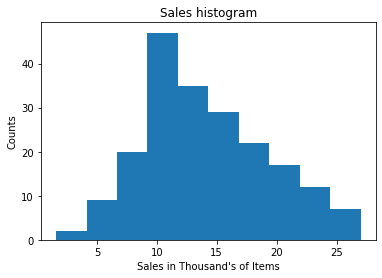

In [9]:
#4. Create histogram for sales data
plt.hist(data["Sales"])
plt.xlabel("Sales in Thousand's of Items")
plt.ylabel("Counts")
plt.title("Sales histogram")
plt.show()

The sales data is clearly unimodal and centered at around $10. This matches what we would expect from the median and mean values. 

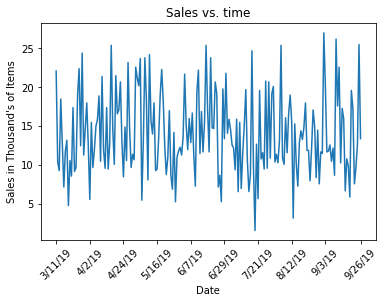

In [10]:
#5. Plot sales over time
import pandas as pd
import numpy as np

plt.plot(data["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales in Thousand's of Items")
plt.title("Sales vs. time")
plt.xticks(ticks=np.asarray(pd.date_range(data.index[0],data.index[-1],10).strftime('%#m/%#d/%#y')),rotation=45)
plt.show()
print()

There does not appear to be any strong trend of the sales data over time. 

In [11]:
#6. Calculate pearson correlation coefficient.
data.corr(method='pearson')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


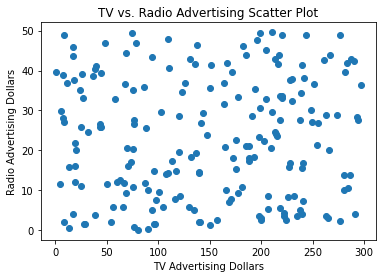

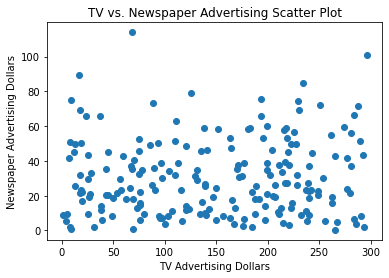

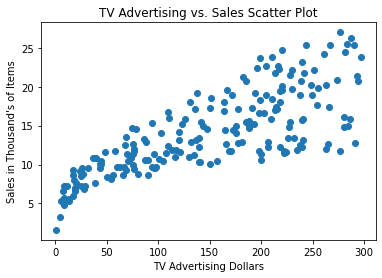

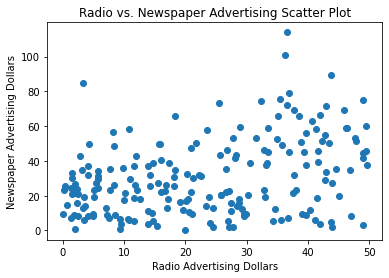

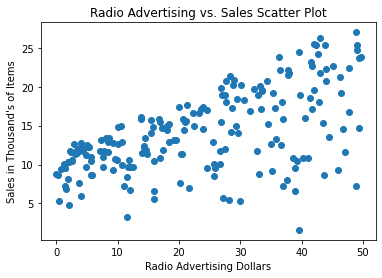

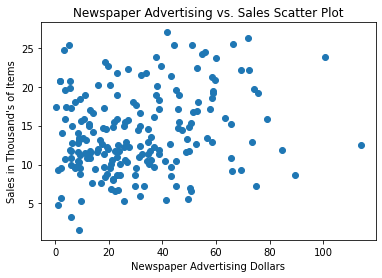

In [12]:
plt.scatter(data["TV"],data["Radio"])
plt.xlabel("TV Advertising Dollars")
plt.ylabel("Radio Advertising Dollars")
plt.title("TV vs. Radio Advertising Scatter Plot")
plt.show()

plt.scatter(data["TV"],data["Newspaper"])
plt.xlabel("TV Advertising Dollars")
plt.ylabel("Newspaper Advertising Dollars")
plt.title("TV vs. Newspaper Advertising Scatter Plot")
plt.show()

plt.scatter(data["TV"],data["Sales"])
plt.xlabel("TV Advertising Dollars")
plt.ylabel("Sales in Thousand's of Items")
plt.title("TV Advertising vs. Sales Scatter Plot")
plt.show()

plt.scatter(data["Radio"],data["Newspaper"],label="TV vs. Radio")
plt.xlabel("Radio Advertising Dollars")
plt.ylabel("Newspaper Advertising Dollars")
plt.title("Radio vs. Newspaper Advertising Scatter Plot")
plt.show()

plt.scatter(data["Radio"],data["Sales"],label="TV vs. Radio")
plt.xlabel("Radio Advertising Dollars")
plt.ylabel("Sales in Thousand's of Items")
plt.title("Radio Advertising vs. Sales Scatter Plot")
plt.show()

plt.scatter(data["Newspaper"],data["Sales"],label="TV vs. Radio")
plt.xlabel("Newspaper Advertising Dollars")
plt.ylabel("Sales in Thousand's of Items")
plt.title("Newspaper Advertising vs. Sales Scatter Plot")
plt.show()

8. 
The boxplot is very good at showing the broader distribution for each of the 4 datasets and for comparing them. The histogram shows more detail (for example, the modality of the graph), rather than just showing 5 summary statistics. However, it is more difficult to compare multiple different histograms to one another, since the figure can quickly get crowded. 
We can also use the scatter plots to gague the modality and relative distribution of each of the datasets; however, this is more difficult and not the strength of scatter plots. Instead, scatter plots allow us to compare two different distributions, not only in terms of where their summary statistics are with respect to one another (such as with the box plots), but also how one value correlates to another. 
For example, we can see a very strong correlation between TV advertising and sales (as supported by the correlation coefficient), where this correlation is not evident from a histogram or boxplot. 

## Part 2
Write a summary of what you find from the data and submit the report to Canvas. 

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html